In [3]:
#Import Libraries, set parametes and create model

import pybamm
import matplotlib.pyplot as plt
# %matplotlib widget

pybamm.set_logging_level("NOTICE")  # To see updates after each steps of charging and discharging
# solution  = [] # blank array defined for storing solutions after simulation
params = pybamm.ParameterValues("Chen2020")    # calling parameters of chen from pybamm
params.update({"SEI kinetic rate constant [m.s-1]": 1e-15,  # updating rate const from -15to-14 for easy calculation
               "Ambient temperature [K]": 298})
spm = pybamm.lithium_ion.SPM(  # Single Particle Model (SPM) is selected with sub models given below
    {"SEI": "ec reaction limited",  # capacity fade model
        "thermal": "lumped",  # thermal model
        "SEI porosity change": "true",  # porosity change model
        "SEI film resistance": "distributed"}  # film resistance model
)

In [4]:
# Define the constants
n:int = int(input('Enter number of cycles : '))
# n_p=pulse(all cyc), n_c=C_value(each_cyc), rt=rest_time(each_cyc)
# if ">4.2V", cc-cv graph - define 2 functions and call them in if...else as fast() & pulse()
n_p:int = int(input("Pulse number for all cycle : "))

#From what cycle onwards should updated cycle parameters take effect
rg:int = int(input("From what cycle : "))

In [5]:
# Define fuction for returning experiment cycle with user parameters

def cycle_with_params(C_value: str, rest_time: str) -> list[str]:

    cycle: list[str] = ["Discharge at 5A until 2.5V"] +[
         f"Charge at {C_value} C for 1 minute or until 4.2 V (1 second period)",
         f"Rest for {rest_time} minutes (10 second period)",
    ] * n_p + ["Charge at 15W until 4.2V", "Hold at 4.2V until 0.01A"]

    return cycle

In [6]:
# Define fuction for simulating experiment
def fast(num_cycles: int, solution_list) -> tuple[int, list]:
    '''
    Takes input number of cycles to simulate, and list of previous simulations
    returns number of entries in solution, and list of solutions
    '''
    n_C: str = input("C value for each cycle : ")
    rt: str = input("Rest time for each cycle : ")
    cycle: list[str] = cycle_with_params(n_C, rt)
    solution:list[pybamm.Solution] = solution_list
    num_entries = 0

    experiment = pybamm.Experiment(operating_conditions=[tuple(cycle)])
    sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=params)

    # When the simulation is run for the first time, the starting_solution is not defined
    if solution == []:
        sol1 = sim.solve()
        num_entries: int = len(sol1["Time [s]"].entries)
        # solving and writing results to variable sol1
        solution.append(sol1) # writing sol1 to solution array

    # n = int(input('Enter number of cycles : '))

    for i in range(num_cycles):
        sol2 = sim.solve(starting_solution=solution[-1])
        solution.append(sol2)

    return num_entries, solution

In [7]:
#Define plotting function

def plot_given_range(solution, start:int, end:int, num_entries:int) -> None:
    '''
    Takes input solution, start and end cycle number, and number of entries to plot
    Plots the voltage and current for the given range of cycles
    '''
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    solutions = solution[start:end]

    for sol in solutions:
        t = sol["Time [s]"].entries
        V = sol["Terminal voltage [V]"].entries
        I = sol["Current [A]"].entries
        ax[0].plot(t[:num_entries], V[len(V) - num_entries:])
        ax[1].plot(t[:num_entries], I[len(I) - num_entries:])

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()

2023-06-30 12:04:17.422 - [NOTICE] logger.func(15): Cycle 1/1 (7.321 ms elapsed) --------------------
2023-06-30 12:04:17.423 - [NOTICE] logger.func(15): Cycle 1/1, step 1/13: Discharge at 5A until 2.5V
2023-06-30 12:04:17.493 - [NOTICE] logger.func(15): Cycle 1/1, step 2/13: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 12:04:17.543 - [NOTICE] logger.func(15): Cycle 1/1, step 3/13: Rest for 5 minutes
2023-06-30 12:04:17.569 - [NOTICE] logger.func(15): Cycle 1/1, step 4/13: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 12:04:17.576 - [NOTICE] logger.func(15): Cycle 1/1, step 5/13: Rest for 5 minutes
2023-06-30 12:04:17.587 - [NOTICE] logger.func(15): Cycle 1/1, step 6/13: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 12:04:17.597 - [NOTICE] logger.func(15): Cycle 1/1, step 7/13: Rest for 5 minutes
2023-06-30 12:04:17.606 - [NOTICE] logger.func(15): Cycle 1/1, step 8/13: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 12:04:17.613 - [NOTICE] logger.func(15): Cy

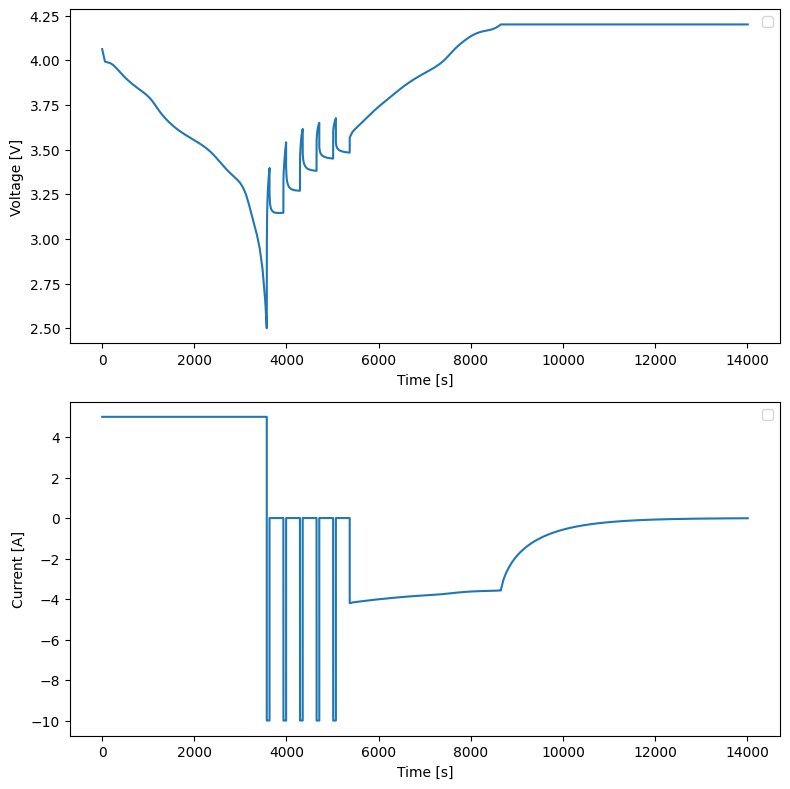

In [8]:
num_entries, solution = fast(rg-1, [])
plot_given_range(solution, 0, rg, num_entries)

In [7]:
_, solution = fast(n-rg, solution)

2023-06-30 11:53:56.604 - [NOTICE] logger.func(15): Cycle 2/2 (107.900 us elapsed) --------------------
2023-06-30 11:53:56.606 - [NOTICE] logger.func(15): Cycle 2/2, step 1/23: Discharge at 5A until 2.5V
2023-06-30 11:53:56.667 - [NOTICE] logger.func(15): Cycle 2/2, step 2/23: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:53:56.704 - [NOTICE] logger.func(15): Cycle 2/2, step 3/23: Rest for 5 minutes
2023-06-30 11:53:56.724 - [NOTICE] logger.func(15): Cycle 2/2, step 4/23: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:53:56.729 - [NOTICE] logger.func(15): Cycle 2/2, step 5/23: Rest for 5 minutes
2023-06-30 11:53:56.733 - [NOTICE] logger.func(15): Cycle 2/2, step 6/23: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:53:56.738 - [NOTICE] logger.func(15): Cycle 2/2, step 7/23: Rest for 5 minutes
2023-06-30 11:53:56.742 - [NOTICE] logger.func(15): Cycle 2/2, step 8/23: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:53:56.746 - [NOTICE] logger.func(15): 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


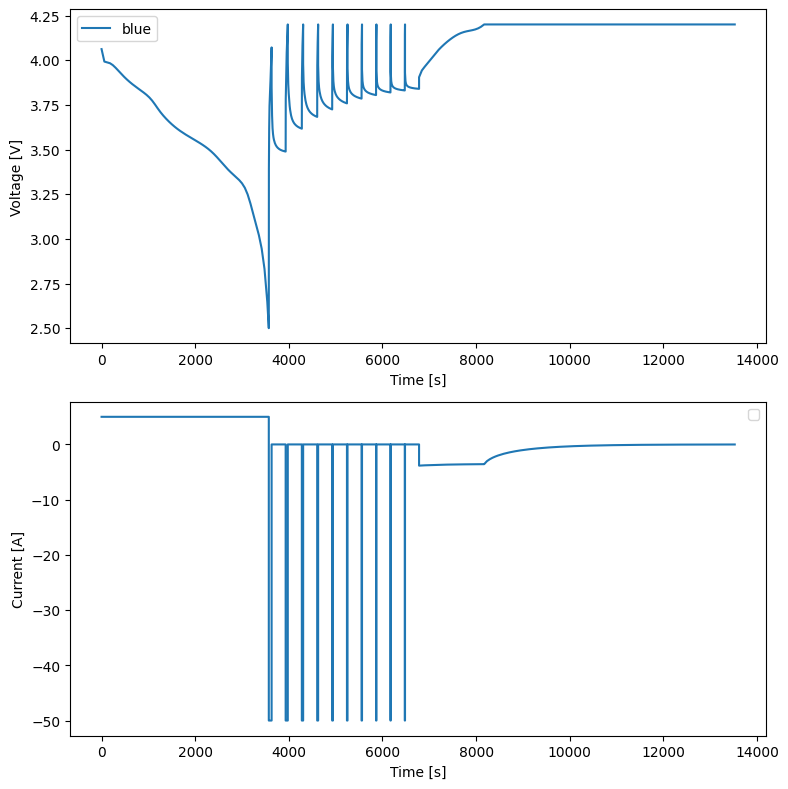

In [12]:
plot_given_range(solution, 0, n, num_entries)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


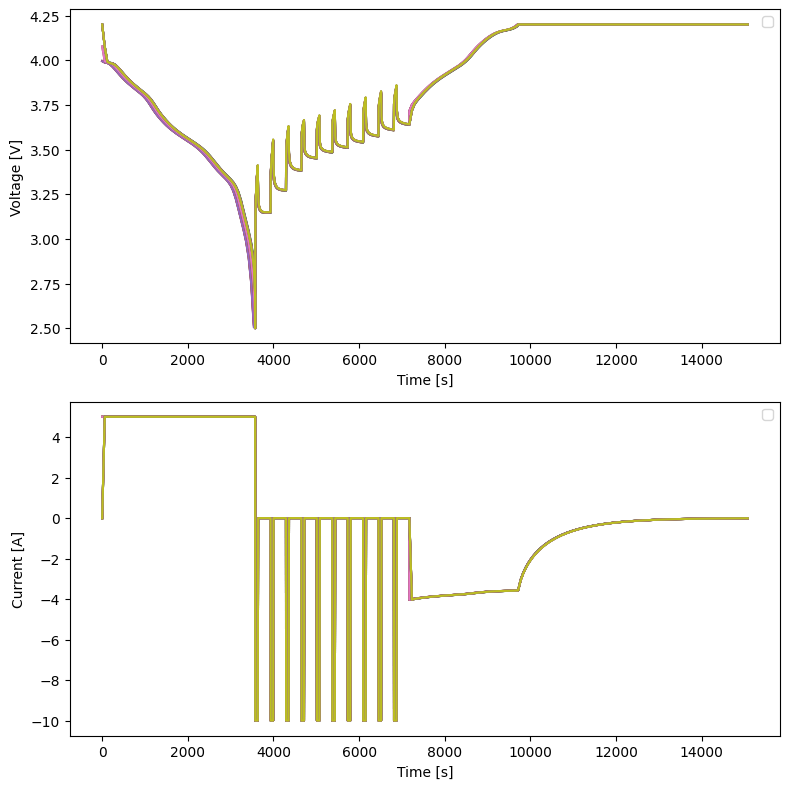

In [9]:
plot_given_range(solution, rg, n, num_entries)